In [69]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

In [70]:
(X_train, y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

In [71]:
X_train.shape[0],X_test.shape[0]

(60000, 10000)

In [72]:
X_clean = np.concatenate((X_train,X_test))
y_digit = np.concatenate((y_train,y_test))
X_clean.shape,y_digit.shape

((70000, 28, 28), (70000,))

In [73]:
X_clean = X_clean/255.0

In [74]:
def show(img):
  plt.matshow(img,cmap='gray')

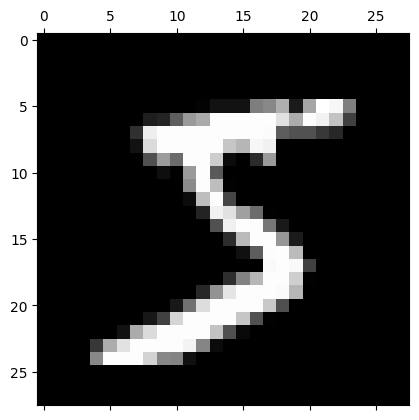

In [75]:
show(X_clean[0])

In [76]:
import copy

In [133]:
def add_noise_to_image(img, probability=0.2, noise_intensity=0.05):
    """
    Add random noise to image data with a specified probability.

    Parameters:
    - image_data: NumPy array representing the image.
    - probability: Probability of adding noise to each pixel.
    - noise_intensity: Intensity of the noise (adjustable).

    Returns:
    - Image data with added noise.
    """
    image_data=copy.deepcopy(img)
    # Create a mask based on the specified probability
    mask = np.random.choice([0, 1], size=image_data.shape, p=[1 - probability, probability])

    # Generate random noise
    noise = np.random.normal(loc=0, scale=noise_intensity, size=image_data.shape)

    # Apply the mask to add noise
    noisy_image = image_data + mask * noise

    noisy_image = np.clip(noisy_image, 0, 1)

    return noisy_image.astype(np.float32)

# Example usage:
# Assuming 'image_data' is a NumPy array representing the image
# noisy_image = add_noise_to_image(image_data, probability=0.2, noise_intensity=25)



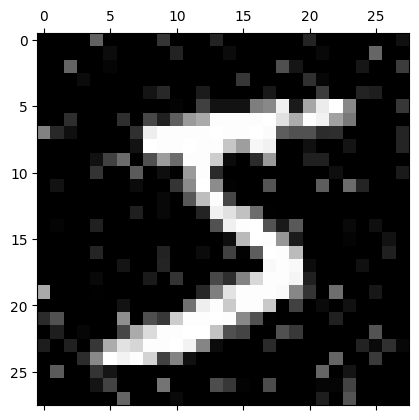

In [136]:
noisy_image = add_noise_to_image(X_clean[0], probability = 0.4,noise_intensity=0.2)
show(noisy_image)

In [138]:
X_noisy=[]
for i in range(X_clean.shape[0]):
  X_noisy.append(add_noise_to_image(X_clean[i], probability = 0.4,noise_intensity=0.2))
X_noisy=np.array(X_noisy)
X_noisy.shape

(70000, 28, 28)

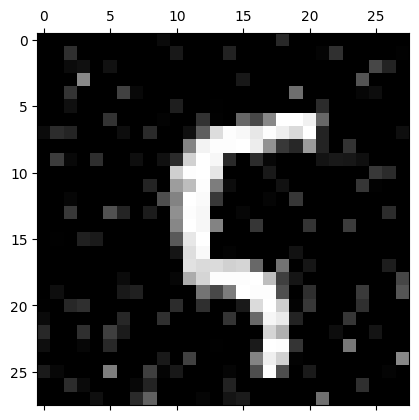

In [140]:
show(X_noisy[100])

In [141]:
X_noisy_train,X_noisy_test,X_clean_train,X_clean_test,y_digit_train, y_digit_test = train_test_split(X_noisy, X_clean,y_digit ,test_size=0.2, random_state=42)

In [142]:
X_noisy_test.shape

(14000, 28, 28)

In [39]:
input_shape =(28,28,1)

In [97]:
def final_model(input_shape):
    # Encoder
    input_layer = tf.keras.layers.Input(shape=input_shape)

    encoded = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
    encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(encoded)

    # encoded = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
    # encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(encoded)

    # # Decoder

    # decoded = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
    # decoded = tf.keras.layers.UpSampling2D((2, 2))(decoded)

    decoded = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
    decoded = tf.keras.layers.UpSampling2D((2, 2))(decoded)

    decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoded)

    # Create autoencoder model
    autoencoder = tf.keras.models.Model(inputs=input_layer, outputs=decoded)

    return autoencoder



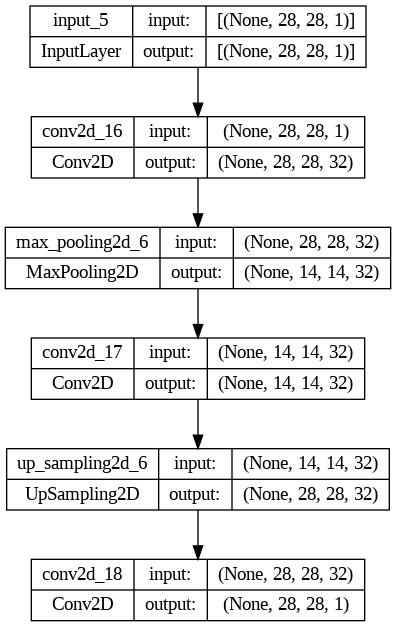

In [143]:
model = final_model(input_shape)
tf.keras.utils.plot_model(model, show_shapes=True)

In [99]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 up_sampling2d_5 (UpSamplin  (None, 28, 28, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 1)         289 

In [144]:
model.compile(optimizer='adam',
                loss = 'mse',
                metrics = 'mse')

In [145]:
model.fit(
    X_noisy_train,
     X_clean_train,
    epochs=4,
    batch_size=32,
    validation_data=(X_noisy_test, X_clean_test)
)

Epoch 1/4
1750/1750 [==============================] - 106s 60ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 2/4
1750/1750 [==============================] - 104s 60ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 3/4
1750/1750 [==============================] - 108s 62ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 4/4
1750/1750 [==============================] - 103s 59ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0015 - val_mse: 0.0015


In [110]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [152]:
# Assuming 'model' is your trained model
model.save('/content/drive/MyDrive/Deep Learning/denoising_autoencoder_CNN.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [112]:
# model_path = "/content/drive/MyDrive/Deep Learning/denoising_autoencoder_CNN.h5"
# model = tf.keras.models.load_model(model_path)

In [146]:
model.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 up_sampling2d_6 (UpSamplin  (None, 28, 28, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 28, 28, 1)         289 

In [147]:
rnd = np.random.randint(0,X_noisy_test.shape[0])
print(rnd)
a = model.predict(np.array([X_noisy_test[rnd]]))

13432
1/1 [==============================] - 0s 90ms/step


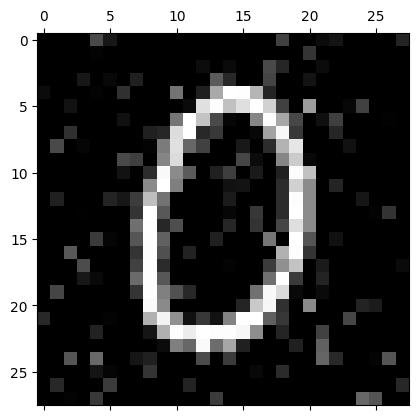

In [148]:
show(X_noisy_test[rnd])

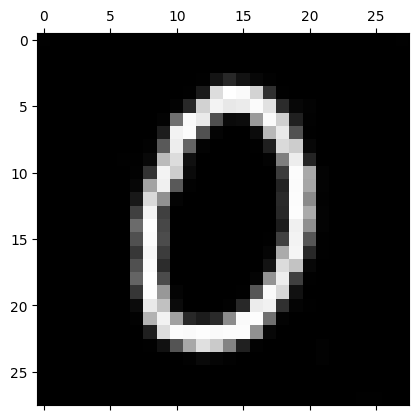

In [149]:
show(a[0])

In [150]:
X_noisy_test_rec = model.predict(X_noisy_test)

438/438 [==============================] - 5s 12ms/step


<ipython-input-151-a75f7947afb4>:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, num_samples, i)


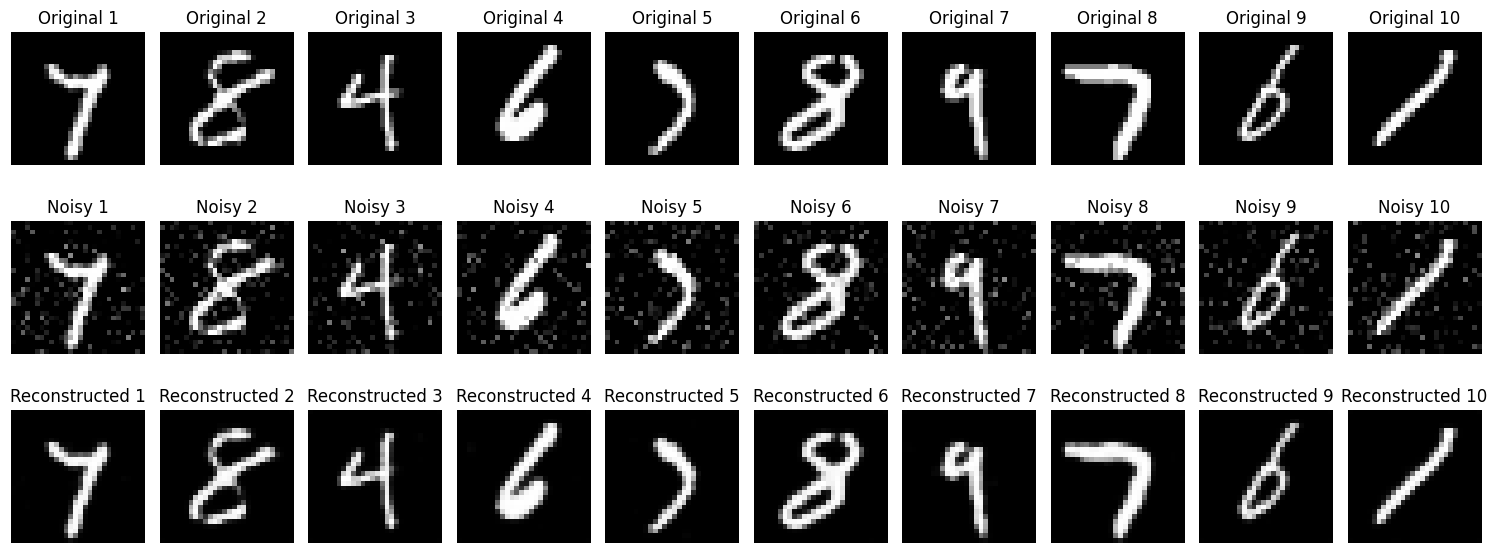

In [151]:
num_samples = 10

# Randomly select 10 indices for visualization
sample_indices = np.random.choice(X_noisy_test_rec.shape[0], num_samples, replace=False)

# Plot the images
plt.figure(figsize=(15, 6))
plt.title("For 20% noise")
for i, index in enumerate(sample_indices, 1):
    # Original (Clean) Image
    plt.subplot(3, num_samples, i)
    plt.imshow(X_clean_test[index],cmap='gray')
    plt.title(f'Original {i}')
    plt.axis('off')

    # Noisy Image
    plt.subplot(3, num_samples, num_samples + i)
    plt.imshow(X_noisy_test[index],cmap='gray')
    plt.title(f'Noisy {i}')
    plt.axis('off')

    # Reconstructed Image
    plt.subplot(3, num_samples, 2 * num_samples + i)
    plt.imshow(X_noisy_test_rec[index],cmap='gray')
    plt.title(f'Reconstructed {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()